In [1]:
#Linear looking dataset

In [2]:
import numpy as np

X = 2*np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100,1)

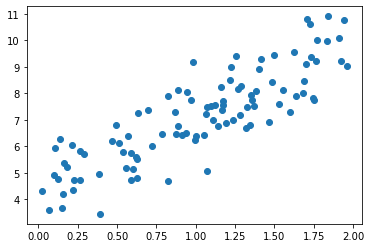

In [3]:
import matplotlib.pyplot as plt

plt.plot(X,y,"o")
plt.show()

In [4]:
X_b = np.c_[np.ones((100,1)),X] #add xo = 1 to each instance

theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)


In [5]:
theta_best

array([[4.34399398],
       [2.73088688]])

In [6]:
X_new = np.array(([0], [2]))
X_new_b = np.c_[np.ones((2, 1)), X_new] #add xo -=1 to each intstance
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.34399398],
       [9.80576775]])

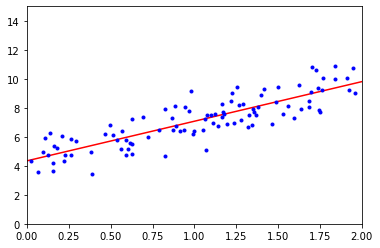

In [7]:
plt.plot(X_new, y_predict, "r-")
plt.plot(X,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [8]:
#perfomring linear regression using Scikit-Learn is simple

from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_

(array([4.34399398]), array([[2.73088688]]))

In [9]:
lin_reg.predict(X_new)

array([[4.34399398],
       [9.80576775]])

In [10]:
theta_best_svd, residuals, rank, s=np.linalg.lstsq(X_b, y, rcond = 1e-6)
theta_best_svd

array([[4.34399398],
       [2.73088688]])

In [11]:
np.linalg.pinv(X_b).dot(y)

array([[4.34399398],
       [2.73088688]])

In [12]:
# implementation of the gradient descent step

eta = 0.1 # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    
theta


array([[4.34399398],
       [2.73088688]])

In [13]:
#This code implements Stochastic Gradient Descent using a simple learning schedule

n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t +t1)

theta = np.random.randn(2, 1) #random initialization

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m +i)
        theta = theta - eta * gradients
        
theta

array([[4.32624883],
       [2.73514588]])

In [14]:
#The following code runs for a maximum 1,000 epochs or until the loss drops by less tha 0.001 during one epoch.

from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol = 1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.30856713]), array([2.73038247]))

In [15]:
# Polynomial Regression

m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X + 2 + np.random.randn(m,1)


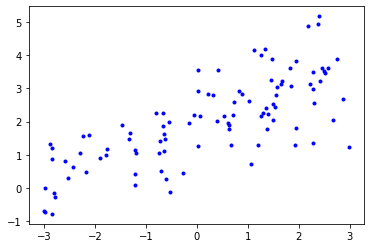

In [16]:
plt.plot(X,y, "b.")

In [17]:
# We can use Scikit leanrs PolynomailFeatures class to transform our training data.

from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [18]:
X[0]

array([1.84139228])

In [19]:
X_poly[0]

array([1.84139228, 3.39072551])

In [20]:
#X_poly now contains the original feature and it's square, you can now fit a linearregression model to this extended training data

lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.97763963]), array([[ 0.55132114, -0.02370532]]))

In [21]:
#the follwoing code defines a function that, given some training data, plots the learning curves of a model

In [22]:
from sklearn.metrics  import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
    train_errors, val_errors =[], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(y_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label ="val")

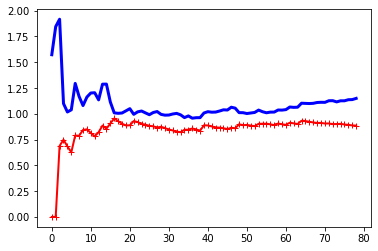

In [23]:
lin_reg=LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [24]:
#lets look at the learning curve of a 10-th degree polynomial model on the same data

In [25]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

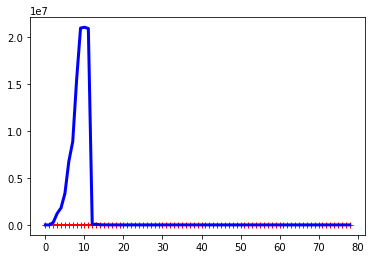

In [26]:
plot_learning_curves(polynomial_regression, X, y)

In [27]:
#Ridge regressio

In [28]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=1, solver="cholesky")
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[2.73531666]])

In [29]:
#and using stochastic GD

sgd_reg = SGDRegressor(penalty="l2")
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([2.70142746])

In [30]:
#Example using the Lasso class

from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict(([[1.5]]))

array([2.69503698])

In [31]:
#Example using Elastic Net

from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([2.7050526])

In [32]:
#basic implementation of early stopping

from copy import deepcopy
from sklearn.preprocessing import StandardScaler

#preapre the data
poly_scaler = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)), 
                    ("std_scaler", StandardScaler())
                        ])

X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transfrom(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True, penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch=None
best_model=None

for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train) # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error <minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

NameError: name 'X_train' is not defined